<a href="https://colab.research.google.com/github/henrygas/unsupervised_learning/blob/master/K_Means_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 装载Google云盘

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 2. 切换当前工作目录

In [0]:
import os
os.chdir("./drive/My Drive/app/K-means-homework")

In [3]:
!ls

data  out


## 3. 读取数据，查看数据内容

In [4]:
import pandas as pd

data_path = "./data/training.csv"
data = pd.read_csv(data_path, names=["target", "intro"])
data.head()

,target,intro
0,2,合晟资产是一家专注于股票、债券等二级市场投资，为合格投资者提供专业资产管理服务的企业。公司业...
1,2,公司的主营业务为向中小微企业、个体工商户、农户等客户提供贷款服务，自设立以来主营业务未发生过变化。
2,1,公司立足于商业地产服务，致力于为商业地产开发、销售、运营全产业链提供一整套增值服务，业务覆盖...
3,2,公司经工商管理部门核准的经营范围为“投资咨询、经济信息咨询，企业管理咨询，品牌推广策划，公共...
4,2,该公司的主营业务为在中国境内(港、澳、台除外)开展保险代理销售，依托于自身的产品研究能力和专...


In [5]:
data.shape

(4774, 2)

## 4. 抽取文本特征

### 4.1 利用jieba分词组件对文本进行分词，并对分词结果去除停用词

In [6]:
import jieba
import chardet

stopwords_file = "./data/stopwords.txt"
jieba_result_file = "./out/jieba_result.txt"

stop_words = set()
with open(stopwords_file, encoding="gbk") as fr:
  stop_words = set([line.strip() for line in fr.readlines()])

with open(jieba_result_file, "w") as fw:
  for intro in data["intro"].values:
    fw.write("/".join(filter(lambda x : x not in stop_words, jieba.cut(intro))))
    fw.write("\n")


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.952 seconds.
Prefix dict has been built succesfully.


### 4.2 采用词袋和TF-IDF相结合，抽取文本特征

TF-IDF的作用是找出某些词用以提取该词所在文档的特色，而词袋模型的作用是找出文档中出现频率高的词；

而有特色的词，既有可能是有意义的专业词，又有可能是无意义的生僻词，可以考虑将两者结合起来，具体步骤是:

+ 通过词袋模型挑出一堆热词;
+ 再用TF-IDF对这些热词加权，得到有区分度的词。


这样就可以通过控制热词数，来将无意义的常用词和有意义的专业词都框进来；

然后再通过加权技术，排除掉无意义的常用词，争取留下有意义的专业词。

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

with open(jieba_result_file, "r") as fr:
  content = np.array([line.strip().replace("/", " ") for line in fr.readlines()])

for each in content[:3]:
  print(each)

tfidf_vec = TfidfVectorizer(min_df=5)
X_tfidf = tfidf_vec.fit_transform(content)

tfidf_vec.get_feature_names()

合晟 资产 一家 专注 股票 债券 二级 市场 投资 合格 投资者 提供 专业 资产 管理 服务 企业 公司 业务范围 包括 资产 管理 投资 咨询 投资 顾问 服务 公司 管理 私募 基金 产品 包括 股票 型 债券 型 资产 管理 计划 证券 投资 基金 管理 总资产 规模 80 亿元 中国 证券 投资 基金业 协会 数据 公司 管理 私募 证券 投资 基金 顾问 管理 类 规模 较大 公司 管理 规模 处于 50 亿元 第一 梯队
公司 主营业务 微 企业 个体 工商户 农户 客户 提供 贷款 服务 设立 主营业务 未 发生 变化
公司 立足于 商业地产 服务 致力于 商业地产 开发 销售 运营 全 产业链 提供 一整套 增值 服务 业务 覆盖 商业 定位 策划 商业 设计 销售 代理 招商 代理 电子商务 商业地产 运管 服务 互联网 电商 模式 O2O 线上 导流 线下 服务 方式 住宅 类 业务 创新 营销 服务 公司 业务 板块 包括 商业地产 策划 顾问 专业 招商 运营 管理 代理 销售 麦吉铺 O2O 电子商务


['00',
 '000',
 '002',
 '004',
 '008',
 '01',
 '02',
 '022',
 '028',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '090',
 '10',
 '100',
 '1000',
 '10000',
 '101',
 '103',
 '104',
 '106',
 '107',
 '108',
 '109',
 '10kv',
 '11',
 '110',
 '110kv',
 '111',
 '11101014',
 '112',
 '113',
 '114',
 '115',
 '116',
 '118',
 '12',
 '120',
 '1200',
 '121',
 '1210',
 '12101310',
 '12101511',
 '125',
 '127',
 '13',
 '130',
 '13101010',
 '13131010',
 '134',
 '135',
 '137',
 '139',
 '14',
 '140',
 '146',
 '15',
 '150',
 '1500',
 '152',
 '156',
 '159',
 '16',
 '160',
 '162',
 '164',
 '167',
 '168',
 '17',
 '170',
 '1710',
 '17101010',
 '17101110',
 '17101210',
 '173',
 '174',
 '175',
 '177',
 '178',
 '179',
 '18',
 '180',
 '19',
 '193',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '201',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',


In [21]:
X_tfidf.shape

(4774, 5826)

In [22]:
type(X_tfidf)

scipy.sparse.csr.csr_matrix

In [23]:
np.array(tfidf_vec.get_feature_names()).shape

(5826,)

In [0]:
X_tfidf_df = pd.DataFrame(data=X_tfidf.A, columns=np.array(tfidf_vec.get_feature_names()))
X_tfidf_df.to_csv("./out/X_tfidf.csv", index=False, header=True)

## 5. 对文本特征进行K-means聚类分析

### 5.1 数据预处理

In [0]:
from sklearn.preprocessing import normalize
from scipy.sparse import csr_matrix

normalize(X_tfidf_df, norm="l2", copy=False)
X_tfidf_df = csr_matrix(X_tfidf_df)


### 5.2 分别计算聚类数K=5,10,15,...,50时的K-means聚类结果

In [42]:
from sklearn.preprocessing import normalize
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score as calinski_harabaz_score
import numpy as np
import time
from functools import wraps

def log(name=None):
  def _wrapper(func):
    @wraps(func)
    def _log(*args, **xargs):
      time_start = time.time()
      print("starting to {}".format(name))
      rtn = func(*args, **xargs)
      print("end to {}, cost time {:.4f}秒".format(name, time.time() - time_start))

      return rtn

    return _log
  
  return _wrapper

@log(name="kmeans")
def kmeans(n_clusters, input):
  estimator = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, max_iter=300, precompute_distances="auto")
  y = estimator.fit_predict(input)

  return y, estimator


class KMeansResult:
  def __init__(self, estimator, k, X, y):
    self.estimator_ = estimator
    self.k_ = k
    self.X_ = X
    self.y_ = y

  @log(name="get_silhouette_score")
  def get_silhouette_score(self):
    return silhouette_score(self.X_.todense(), self.y_, metric="euclidean")

  @log(name="get_calinski_harabaz_score")
  def get_calinski_harabaz_score(self):
    return calinski_harabaz_score(self.X_.todense(), self.y_)

  @log(name="get_sse_score")
  def get_sse_score(self):
    return self.estimator_.inertia_

results = list()

k_range = range(5, 55, 5)

for k in k_range:
  print("\ntrying k={}".format(k))
  y, estimator = kmeans(k, X_tfidf_df)
  
  kmeans_result = KMeansResult(estimator, k, X_tfidf_df, y)
  results.append(kmeans_result)

print("Over!")


trying k=5
starting to kmeans
end to kmeans, cost time 68.3874秒

trying k=10
starting to kmeans
end to kmeans, cost time 75.2233秒

trying k=15
starting to kmeans
end to kmeans, cost time 76.3127秒

trying k=20
starting to kmeans
end to kmeans, cost time 83.8821秒

trying k=25
starting to kmeans
end to kmeans, cost time 70.3532秒

trying k=30
starting to kmeans
end to kmeans, cost time 78.1615秒

trying k=35
starting to kmeans
end to kmeans, cost time 73.6829秒

trying k=40
starting to kmeans
end to kmeans, cost time 76.0254秒

trying k=45
starting to kmeans
end to kmeans, cost time 75.8708秒

trying k=50
starting to kmeans
end to kmeans, cost time 81.6496秒
Over!


画出不同k值下的轮廓系数

starting to get_silhouette_score
end to get_silhouette_score, cost time 4.5312秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4797秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4639秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4538秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4948秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4466秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4878秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4508秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4402秒
starting to get_silhouette_score
end to get_silhouette_score, cost time 4.4950秒


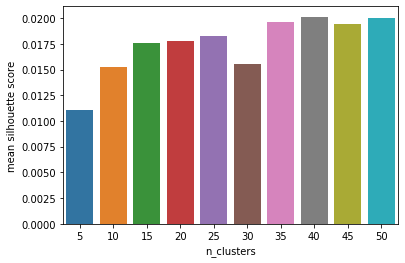

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

k_list = np.array([each.k_ for each in results])
score_list = np.array([each.get_silhouette_score() for each in results])

sns.barplot(x=k_list, y=score_list)
plt.xlabel("n_clusters")
plt.ylabel("mean silhouette score")
plt.show()

画出不同k值下的CH指数

starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.5489秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3399秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3237秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3169秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3115秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3200秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3030秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3067秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3047秒
starting to get_calinski_harabaz_score
end to get_calinski_harabaz_score, cost time 0.3014秒


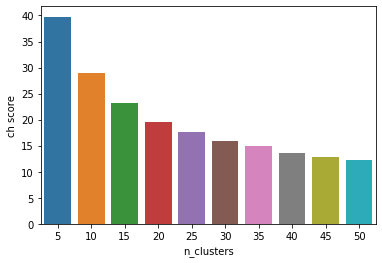

In [44]:
from sklearn import metrics

k_list = np.array([each.k_ for each in results])
ch_score_list = np.array([each.get_calinski_harabaz_score() for each in results])

sns.barplot(x=k_list, y=ch_score_list)
plt.xlabel("n_clusters")
plt.ylabel("ch score")
plt.show()

### 5.3 计算k=11类时的结果，并对聚类结果进行可视化

In [33]:
k = 11
y, estimator = kmeans(k, X_tfidf_df)
kmeans_result = KMeansResult(estimator, k, X_tfidf_df, y)


starting to kmeans
end to kmeans, cost time 80.1050秒


In [34]:
y_real = data["target"]
y_real.shape

(4774,)

In [35]:
y.shape

(4774,)

In [36]:
X = X_tfidf_df.todense()
X.shape

(4774, 5826)

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(X_tfidf_df.todense())

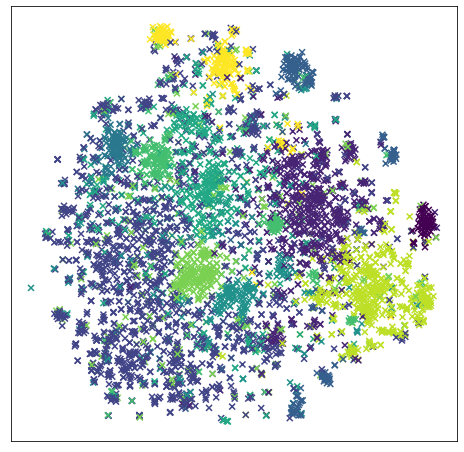

<Figure size 432x288 with 0 Axes>

In [41]:
real_x = list([each[0] for each in decomposition_data])
real_y = list([each[1] for each in decomposition_data])
plt.figure(figsize=(8, 8))
plt.scatter(x=real_x, y=real_y, c=y, marker="x")
plt.xticks(())
plt.yticks(())
plt.show()

plt.savefig("./out/cluster.png", aspect=1)